In [ ]:
**Interesting Insights From the Exploratory Data Analysis of 500 album**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('rym_top_500_albums.tsv',sep="\t")
print(df.head())
print(df.info())
print(df.shape)

   position   album_id        artist                              name  date  \
0         1    Album45     Radiohead                       Ok Computer  1997   
1         2    Album46     Radiohead                             Kid A  2000   
2         3   Album976    Pink Floyd         The Dark Side Of The Moon  1973   
3         4   Album974    Pink Floyd                Wish You Were Here  1975   
4         5  Album2328  King Crimson  In The Court Of The Crimson King  1969   

                                    genres  rating  num_ratings  num_reviews  
0               Alternative Rock, Art Rock    4.23        60527         1583  
1  Art Rock, Experimental Rock, Electronic    4.23        50279          714  
2               Art Rock, Progressive Rock    4.23        50633         1524  
3               Progressive Rock, Art Rock    4.29        41760          939  
4               Progressive Rock, Art Rock    4.31        37873          828  
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [2]:
df = df.drop(['position','album_id'],axis=1)

In [3]:
df = df.rename(columns={'name':'album'})

In [4]:
split = df['genres'].apply(lambda x : pd.Series(x.split(", "))).stack()
split_pd = pd.DataFrame(split)
split_reset = split_pd.reset_index()
df_reset = df.reset_index()

In [6]:
df_temp = pd.merge(split_reset,df_reset,left_on='level_0',right_on='index')
df_temp.columns = df_temp.columns.astype('str')
df_temp = df_temp.rename(columns={'0':'genre'})
df_temp = df_temp.drop(['level_0','level_1','index'],axis=1)
def reorder_columns(columns, first_cols=[], last_cols=[]):
    columns = list(set(columns) - set(first_cols))
    columns = list(set(columns) - set(last_cols))
    new_order = first_cols + columns + last_cols
    return new_order
mylist = df_temp.columns.tolist()
reorder_col = reorder_columns(mylist,first_cols=['album','date','genre'],last_cols=['num_reviews'])
df_temp = df_temp[reorder_col]

Text(0.5, 1.0, 'List of top 10 genres')

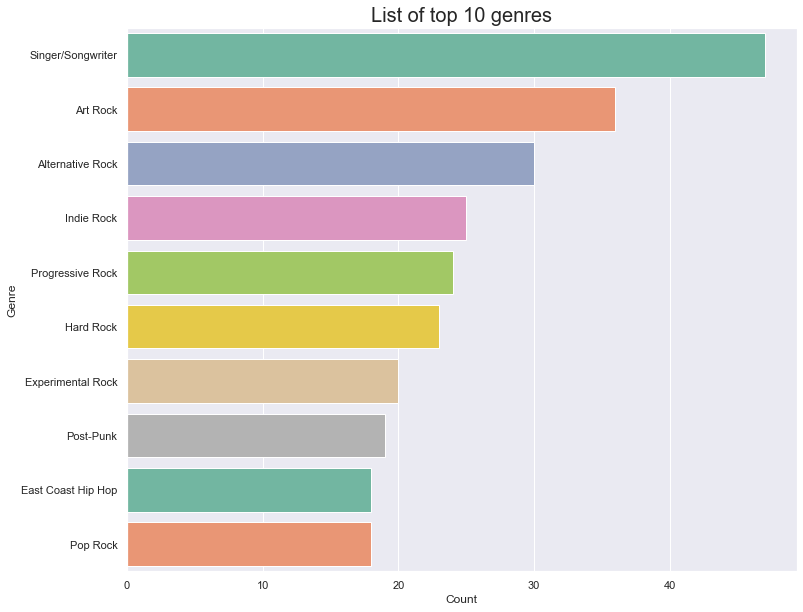

In [7]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='genre', data=df_temp, palette="Set2", order=df_temp['genre'].value_counts().index[0:10])
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('List of top 10 genres',fontsize=20)

Text(0.5, 1.0, 'Album count by year')

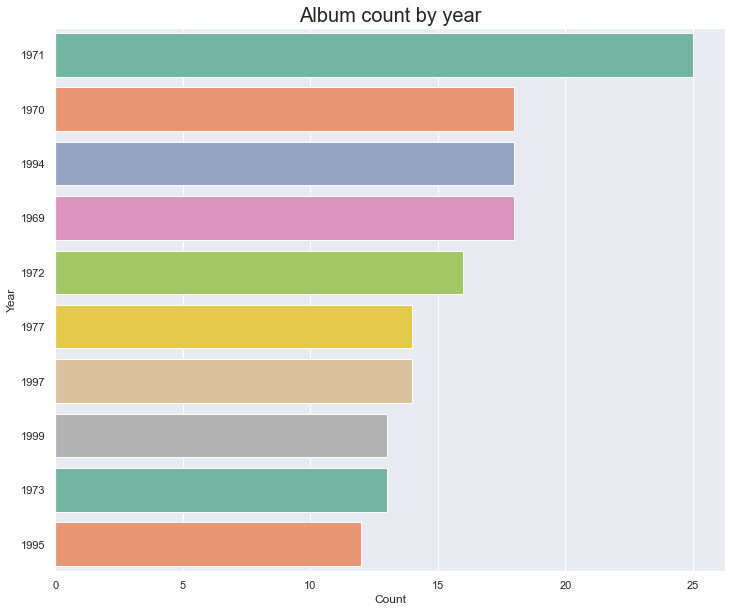

In [8]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='date', data=df, palette="Set2", order=df['date'].value_counts().index[0:10])
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Album count by year',fontsize=20)

Text(0.5, 1.0, 'List of top 10 artists with highest number of album')

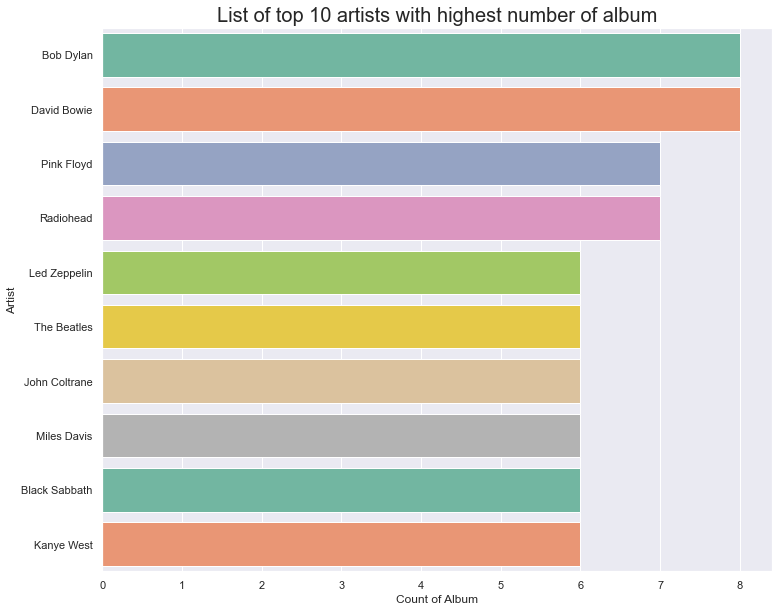

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='artist', data=df, palette="Set2", order=df['artist'].value_counts().index[0:10])
plt.xlabel('Count of Album')
plt.ylabel('Artist')
plt.title('List of top 10 artists with highest number of album',fontsize=20)

In [10]:
print(df.sort_values(by=['rating'],ascending=False).head())

                          artist                                album  date  \
42                        Mingus  The Black Saint And The Sinner Lady  1963   
4                   King Crimson     In The Court Of The Crimson King  1969   
25                 John Coltrane                       A Love Supreme  1965   
3                     Pink Floyd                   Wish You Were Here  1975   
243  The Jimi Hendrix Experience          The Jimi Hendrix Experience  2000   

                                                genres  rating  num_ratings  \
42                      Avant-Garde Jazz, Third Stream    4.35        16679   
4                           Progressive Rock, Art Rock    4.31        37873   
25                    Spiritual Jazz, Avant-Garde Jazz    4.31        21402   
3                           Progressive Rock, Art Rock    4.29        41760   
243  Psychedelic Rock, Hard Rock, Blues Rock, Acid ...    4.28          656   

     num_reviews  
42           346  
4           